In [1]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.manifold import TSNE

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
(df.isna().sum(axis = 0) == 0).index[(df.isna().sum(axis = 0) == 0)]

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'Type'],
      dtype='object')

In [6]:
criteriun = (df.isna().sum(axis = 0) != 0)

df[criteriun.index[criteriun]].isna().sum(axis = 0)

SERVER               1
CONTENT_LENGTH     812
DNS_QUERY_TIMES      1
dtype: int64

In [7]:
df.drop(['CONTENT_LENGTH', 'URL', 'WHOIS_UPDATED_DATE', 'WHOIS_REGDATE'], axis = 1, inplace = True);

In [8]:
pd.options.display.max_columns = 999
df.describe(include = object)

,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO
count,1781,1780,1781,1781
unique,9,239,49,182
top,UTF-8,Apache,US,CA
freq,676,386,1103,372


In [9]:
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [10]:
df['Type'].value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [11]:
itens_count = df[df['Type']==1]['SERVER'].value_counts().iteritems()

agg = 0
WHOIS_COUNTRY_keep = []
while agg < 0.90:
    k,v = next(itens_count)
    agg += v/216
    WHOIS_COUNTRY_keep += [k]
    print('Category = '+k)
    print('Fraction = %0.2f'%(v/216))
print('\nAggregated = %0.2f'%agg)

Category = Apache
Fraction = 0.42
Category = nginx
Fraction = 0.23
Category = Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch
Fraction = 0.06
Category = Microsoft-IIS/6.0
Fraction = 0.06
Category = nginx/1.12.0
Fraction = 0.03
Category = cloudflare-nginx
Fraction = 0.03
Category = Apache/2.2.22 (Debian)
Fraction = 0.02
Category = Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4
Fraction = 0.02
Category = nginx/1.10.1
Fraction = 0.02
Category = Microsoft-HTTPAPI/2.0
Fraction = 0.01
Category = nginx/1.8.0
Fraction = 0.01

Aggregated = 0.91


In [22]:
itens_count = df[df['Type']==1]['WHOIS_COUNTRY'].value_counts().iteritems()

agg = 0
WHOIS_COUNTRY_keep = []
while agg < 0.90:
    k,v = next(itens_count)
    agg += v/216
    WHOIS_COUNTRY_keep += [k]
    print('Category = '+k)
    print('Fraction = %0.2f'%(v/216))
print('\nAggregated = %0.2f'%agg)

Category = None
Fraction = 0.30
Category = ES
Fraction = 0.29
Category = US
Fraction = 0.23
Category = CZ
Fraction = 0.04
Category = ru
Fraction = 0.02
Category = GB
Fraction = 0.02
Category = CN
Fraction = 0.01

Aggregated = 0.90


In [25]:
itens_count = df[df['Type']==1]['WHOIS_STATEPRO'].value_counts().iteritems()

agg = 0
WHOIS_STATEPRO_keep = []
while agg < 0.90:
    k,v = next(itens_count)
    agg += v/216
    WHOIS_STATEPRO_keep += [k]
    print('Category = '+k)
    print('Fraction = %0.2f'%(v/216))
print('\nAggregated = %0.2f'%agg)

Category = None
Fraction = 0.33
Category = Barcelona
Fraction = 0.29
Category = Utah
Fraction = 0.06
Category = California
Fraction = 0.06
Category = PRAHA
Fraction = 0.04
Category = WC1N
Fraction = 0.02
Category = Krasnoyarsk
Fraction = 0.02
Category = CA
Fraction = 0.01
Category = PA
Fraction = 0.01
Category = Washington
Fraction = 0.01
Category = WA
Fraction = 0.01
Category = PANAMA
Fraction = 0.01
Category = Arizona
Fraction = 0.01
Category = ON
Fraction = 0.01
Category = Montevideo
Fraction = 0.01
Category = beijingshi
Fraction = 0.00

Aggregated = 0.90


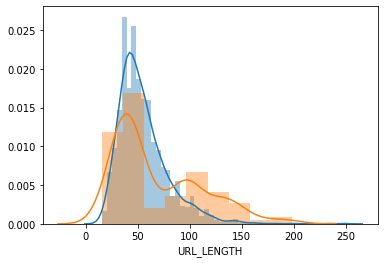

In [14]:
sbn.distplot(df[df['Type'] == 0]['URL_LENGTH'])
sbn.distplot(df[df['Type'] == 1]['URL_LENGTH'])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
for col in df.select_dtypes(include = object).columns:
    df[col + '_label'] = le.fit_transform(df[col].fillna('unknown'))

In [17]:
df.select_dtypes(exclude = object).corr()['Type']

URL_LENGTH                   0.162104
NUMBER_SPECIAL_CHARACTERS    0.280897
TCP_CONVERSATION_EXCHANGE   -0.040202
DIST_REMOTE_TCP_PORT        -0.082925
REMOTE_IPS                  -0.078783
APP_BYTES                   -0.011262
SOURCE_APP_PACKETS          -0.034414
REMOTE_APP_PACKETS          -0.032897
SOURCE_APP_BYTES            -0.043852
REMOTE_APP_BYTES            -0.011004
APP_PACKETS                 -0.034414
DNS_QUERY_TIMES              0.068753
Type                         1.000000
CHARSET_label               -0.090948
SERVER_label                -0.082655
WHOIS_COUNTRY_label         -0.248438
WHOIS_STATEPRO_label         0.010345
Name: Type, dtype: float64

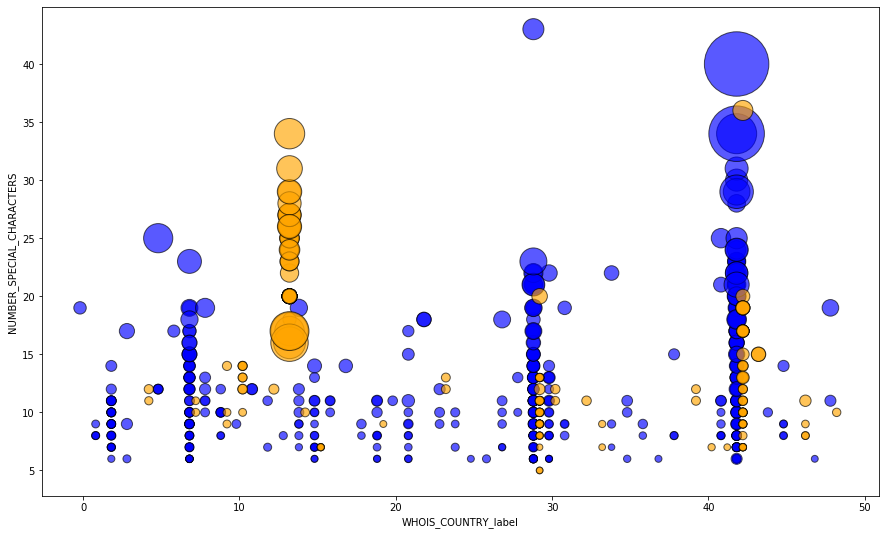

In [18]:
plt.figure(figsize = (15,9))
sbn.scatterplot(df[df['Type'] == 0]['WHOIS_COUNTRY_label']-0.2,
                df[df['Type'] == 0]['NUMBER_SPECIAL_CHARACTERS'],
                s = 30*1.020**df[df['Type'] == 0]['URL_LENGTH'],
                color = 'b',
                alpha = 0.65,
                edgecolor = 'k',
                linewidth=1,
                zorder = 0)
sbn.scatterplot(df[df['Type'] == 1]['WHOIS_COUNTRY_label']+0.2,
                df[df['Type'] == 1]['NUMBER_SPECIAL_CHARACTERS'],
                s = 30*1.020**df[df['Type'] == 1]['URL_LENGTH'],
                color = 'orange',
                alpha = 0.65,
                edgecolor = 'k',
                linewidth=1,
                zorder = 1)

In [23]:
WHOIS_COUNTRY_keep

['None', 'ES', 'US', 'CZ', 'ru', 'GB', 'CN']

In [26]:
WHOIS_STATEPRO_keep

['None',
 'Barcelona',
 'Utah',
 'California',
 'PRAHA',
 'WC1N',
 'Krasnoyarsk',
 'CA',
 'PA',
 'Washington',
 'WA',
 'PANAMA',
 'Arizona',
 'ON',
 'Montevideo',
 'beijingshi']